### Importing the libraries

In [569]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy
import os

In [570]:
import warnings
warnings.filterwarnings("ignore")

### Importing the sample dataset

In [571]:
os.chdir(r'C:\Users\Al barak\Desktop\ml project\Regression Project _Indian House rent prediction')
data = pd.read_csv("House_Rent_Dataset.csv")

#making copy of original datset
data1 = data.copy()

#scanning the dataset using descriptive statistics
data1.describe(include="all")

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
count,4746,4746.000000,4.746000e+03,4746.000000,4746,4746,4746,4746,4746,4746,4746.000000,4746
unique,81,NaN,NaN,NaN,480,3,2235,6,3,3,NaN,3
top,2022-07-06,NaN,NaN,NaN,1 out of 2,Super Area,Bandra West,Mumbai,Semi-Furnished,Bachelors/Family,NaN,Contact Owner
freq,311,NaN,NaN,NaN,379,2446,37,972,2251,3444,NaN,3216
mean,NaN,2.083860,3.499345e+04,967.490729,NaN,NaN,NaN,NaN,NaN,NaN,1.965866,NaN
std,NaN,0.832256,7.810641e+04,634.202328,NaN,NaN,NaN,NaN,NaN,NaN,0.884532,NaN
min,NaN,1.000000,1.200000e+03,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
25%,NaN,2.000000,1.000000e+04,550.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN
50%,NaN,2.000000,1.600000e+04,850.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN
75%,NaN,3.000000,3.300000e+04,1200.000000,NaN,NaN,NaN,NaN,NaN,NaN,2.000000,NaN


## EXPLORATORY DATA ANALYSIS

In [572]:
# To avoid biasness,EDA is made before data wrangling
data1["Furnishing Status"].value_counts()

Semi-Furnished    2251
Unfurnished       1815
Furnished          680
Name: Furnishing Status, dtype: int64

#### UNIVARIATE ANALYSIS

In [573]:
#Since the variable "floor" contains floor number and total floors in the building,we split it into two separate columns for analysis
data1["Floor Number"]=data1["Floor"].apply(lambda x:str(x).split()[0])
data1["Total Floor"]=data1["Floor"].apply(lambda x:str(x).split()[-1])

#dropping the original column
data1.drop(["Floor"],axis=1,inplace=True)
data1.head(3)

,Posted On,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Floor Number,Total Floor
0,2022-05-18,2,10000,1100,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner,Ground,2
1,2022-05-13,2,20000,800,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3
2,2022-05-16,2,17000,1000,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner,1,3


In [574]:
#Assiging Labels for floor which are mentioned in text (note:No Cleaning / filling is done)
data1["Floor Number"] = data1["Floor Number"].replace(["Ground"],0) #Assuming ground floor as 0
data1["Floor Number"] = data1["Floor Number"].replace(["Upper"],-1) #Assuming upper basement as -1
data1["Floor Number"] = data1["Floor Number"].replace(["Lower"],-2) #Assuming lower basement as -2
data1["Total Floor"] = data1["Total Floor"].replace(["Ground"],0)
#print(data1["Floor Number"].value_counts())

In [575]:
#creating a function to make frequency plot
def count_plot(var):
    plt.figure(figsize=(6,3))
    sns.countplot(data1[var],data = data1, palette='hls')
    plt.xticks(rotation = 90)
    plt.title("No of Houses"+" vs "+var)
    return (plt.show())

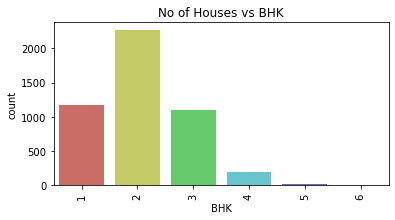

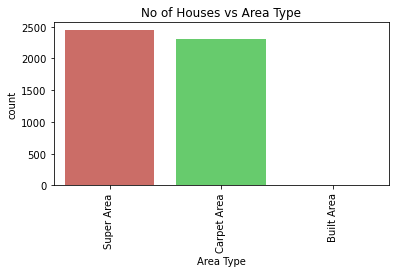

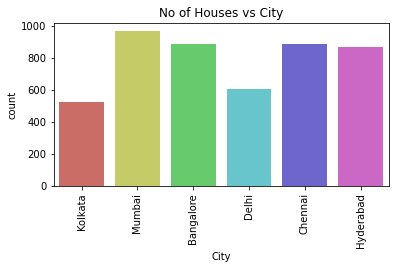

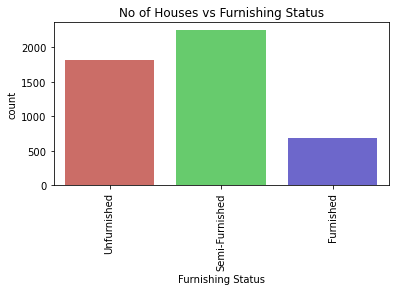

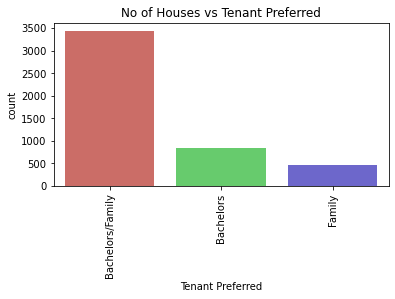

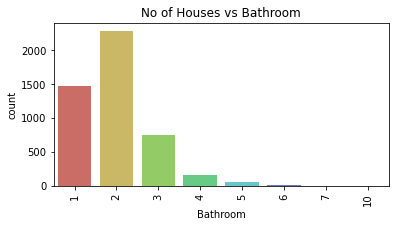

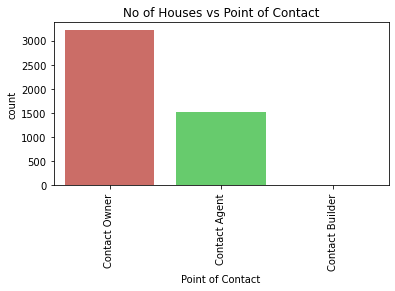

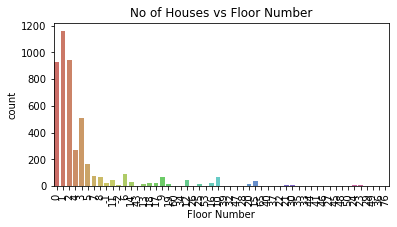

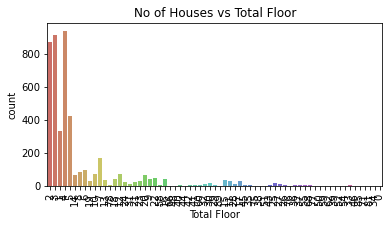

In [576]:
#Choosen categorical and discrete numerical for frequency plot
cat_var = ['BHK','Area Type','City','Furnishing Status','Tenant Preferred','Bathroom','Point of Contact',"Floor Number","Total Floor"]
for i in cat_var:
    count_plot(i)

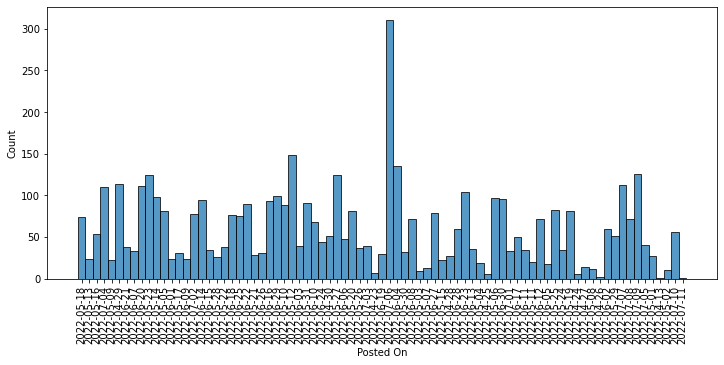

In [577]:
#Posted on
plt.figure(figsize=(12,5))
sns.histplot(data1["Posted On"])
plt.xticks(rotation = 90)
plt.show()

In [578]:
#Identifying the proportions of each scales in categorical variables
def perc(row):
    x = pd.crosstab(data1[row],columns = "Count")
    perc = (x*100)/x.sum()
    return (perc.sort_values(by = ["Count"],ascending = False).head())

In [579]:
cat_var = ['BHK','Area Type','City','Furnishing Status','Tenant Preferred','Bathroom','Point of Contact',"Floor Number","Total Floor"]
#for i in cat_var:
 #print(perc(i))

AxesSubplot(0.125,0.125;0.775x0.755)


<AxesSubplot:xlabel='Size', ylabel='Density'>

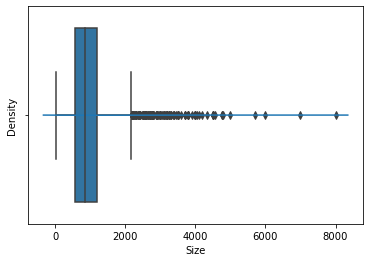

In [580]:
#Numerical variable
#Size(sq.ft) of the house 
print(sns.boxplot(data1["Size"]))
sns.distplot(data1["Size"])

<AxesSubplot:xlabel='Rent'>

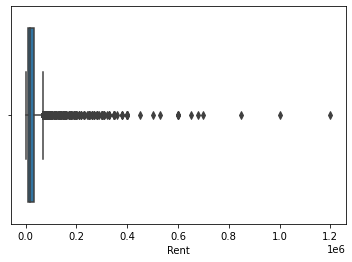

In [581]:
#Rent
#oulier record
#data1 = data1["Rent"].replace([data1["Rent"]>3000000],data1.Rent.mean())
data1['Rent'] = np.where(data1['Rent'] > 3000000, np.mean(data1["Rent"]), data1["Rent"])
#logically we understand for such a smaller sized house the rent mentioned is meaningless,so lets remove this cell and fill will mean of the column.

sns.boxplot(data1["Rent"])
#we can a potential outlier clearly which is completely skewing the data,so lets fill it will mean value of the column.

##### Insights from Univariate Analysis:  

#Under our analysis,47% of the houses are 2bhk ones.  
#50% of the houses comes under super area type.  
#Compared to Delhi and kolkatta ,other cities has more availabilty for rental living.  
#47% of the houses are semi furnished.  
#72% of the houses are given preference for family.  
#48% of the houses has 2bathrooms.  
#Majority of the house can be contacted through Owner.   
#The average rent of houses of all the houses in our analysis is 35000 and maximum rent is 35,00,000 which seems erroneous and shows there could be possible ouliers.  
#50% of the houses are above 850sq.ft.  
#75% of the houses are in size less than 1200sq.ft where as remaining 25% between 1200 and 8000.  
#75% of the house's rent are lesser than 33,000 and where as the remaining 25% varies to 3500000,which shows there could be potential outlier.

#### BIVARIATE  ANALYSIS

#HYPOTHESIS:  
1.Bigger houses(sq.ft) have higher rents  
2.Based on the city the rent differs  
3.Rental price of furnished houses are greater  
4.When the point of contact is owner the rent is less  

In [582]:
def pcat_target(var,tar):
    data1.groupby([var])[tar].mean().plot(kind='bar',figsize=(6,3),color="blue",fontsize=10,edgecolor="Black")
    plt.xlabel(var,fontsize=12)
    plt.ylabel(tar,fontsize=12)
    plt.title(var+" vs "+"avg"+tar,fontsize=14)
    return (plt.show())

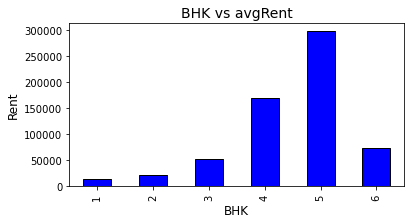

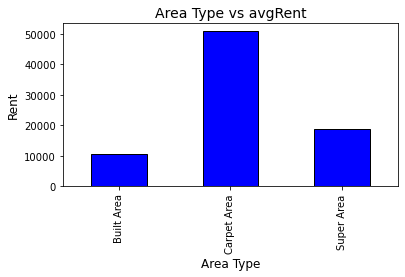

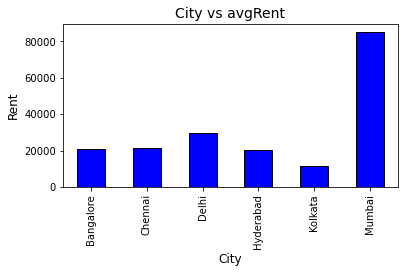

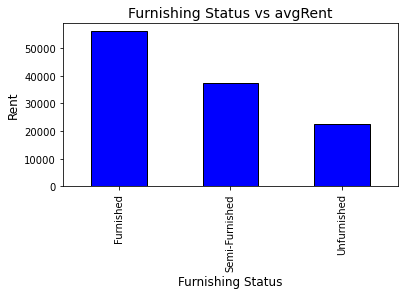

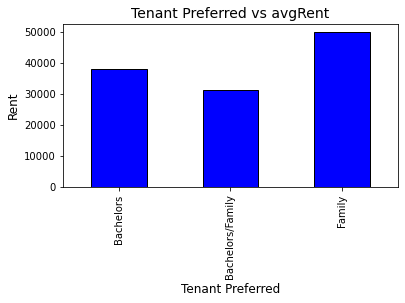

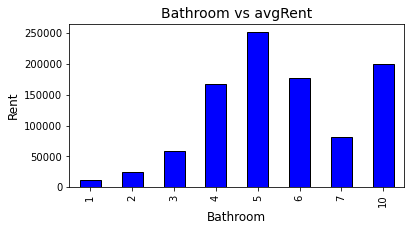

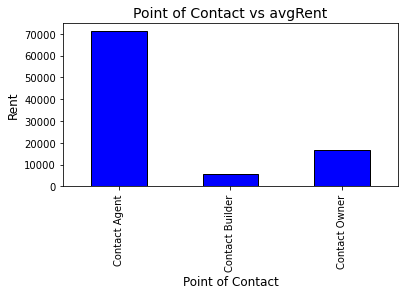

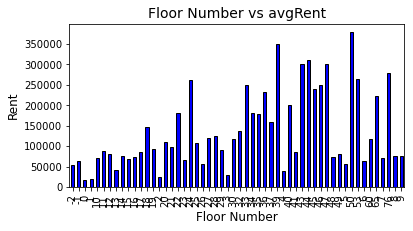

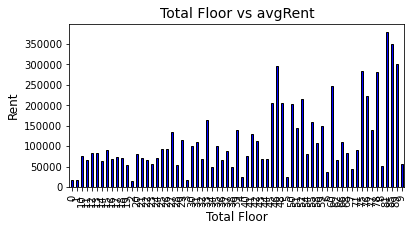

In [583]:
cat_var = ['BHK','Area Type','City','Furnishing Status','Tenant Preferred','Bathroom','Point of Contact','Floor Number','Total Floor']
for i in cat_var:
    pcat_target(i,'Rent')

In [584]:
def bivar_mean(var):
    x =  data1[[var,"Rent"]].groupby([var]).mean()
    return x    

In [585]:
for i in cat_var:
    print(bivar_mean(i))

              Rent
BHK               
1     14139.223650
2     22113.864018
3     52707.319172
4    168864.555556
5    297500.000000
6     73125.000000
                     Rent
Area Type                
Built Area   10500.000000
Carpet Area  50878.061554
Super Area   18673.396566
                   Rent
City                   
Bangalore  21055.523083
Chennai    21614.092031
Delhi      29461.983471
Hyderabad  20555.048387
Kolkata    11645.173664
Mumbai     85321.204733
                           Rent
Furnishing Status              
Furnished          56110.305882
Semi-Furnished     37179.491982
Unfurnished        22461.635813
                          Rent
Tenant Preferred              
Bachelors         37969.087291
Bachelors/Family  31210.792683
Family            50020.341102
                   Rent
Bathroom               
1          11862.162144
2          25043.538193
3          58550.521297
4         167846.153846
5         252350.000000
6         177500.000000
7          81666.66

In [586]:
#convert to int
data1["Floor Number"] = pd.to_numeric(data1["Floor Number"])
data1["Total Floor"] = pd.to_numeric(data1["Total Floor"])

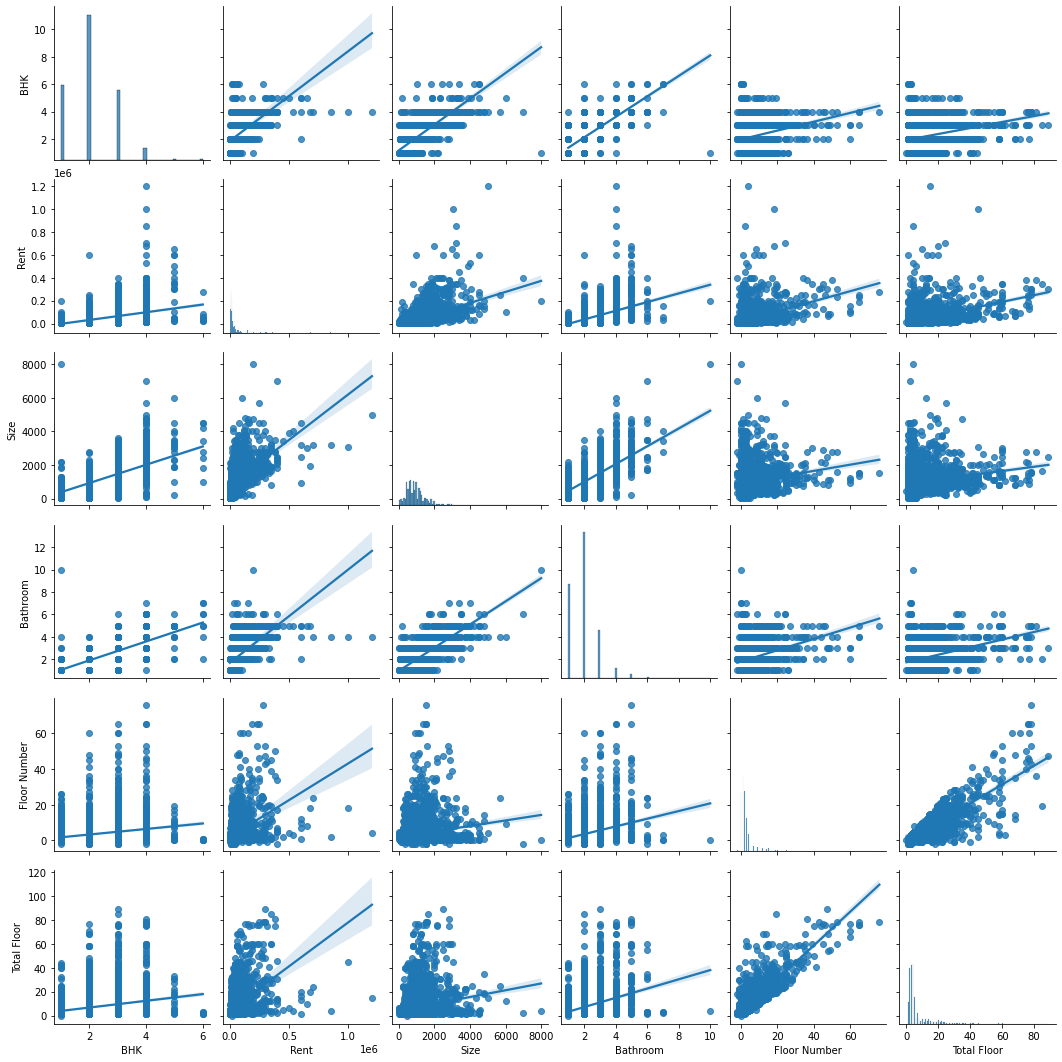

In [587]:
#Check for relation between variables
sns.pairplot(data1,kind = "reg")

### Multivariate analysis

#Hypothesis  
1.2BHK in Mumbai is higher compared to other cities     
2.Furnished Smaller house are as costlier as unfurnished bigger size house in banglore.   
3.Higher the floor higher the price   
4.Smaller house with more bhk are costlier or Larger houses with less bhk are costlier  

<AxesSubplot:xlabel='BHK', ylabel='Rent'>

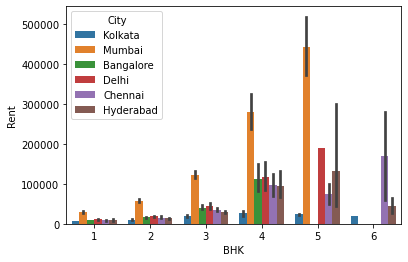

In [588]:
#To check for 2BHK rent in mumbai compared to other cities
sns.barplot(x=data1["BHK"],y=data1["Rent"],hue=data1["City"])

In [589]:
#to cross check number of houses in each bhk type for each city
pd.crosstab(data1["City"],columns = data["BHK"])

BHK,1,2,3,4,5,6
City,,,,,,
Bangalore,270,431,162,23,0,0
Chennai,163,484,220,20,2,2
Delhi,160,254,154,36,1,0
Hyderabad,145,446,243,26,3,5
Kolkata,142,276,92,11,2,1
Mumbai,287,374,227,73,11,0


In [590]:
#separating banglore data to separate data frame for analysis
bglore_data = data1[data1["City"]=="Bangalore"]

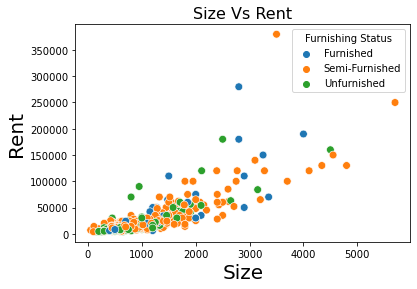

In [591]:
#To check furnished house are costlier than unfurnished house in banglore
plt.title("Size Vs Rent",fontsize=16)
sns.scatterplot(bglore_data.Size,bglore_data.Rent,hue=bglore_data["Furnishing Status"],s=60)
plt.xlabel("Size",fontsize=20)
plt.ylabel("Rent",fontsize=20)
plt.show()

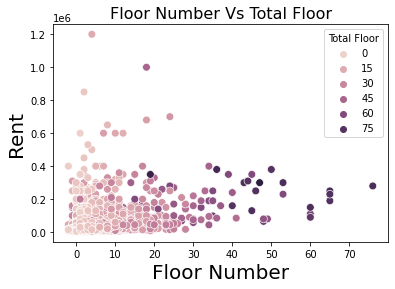

In [592]:
plt.title("Floor Number Vs Total Floor",fontsize=16)
sns.scatterplot(data1["Floor Number"],data1.Rent,hue=data1["Total Floor"],s=60)
plt.xlabel("Floor Number",fontsize=20)
plt.ylabel("Rent",fontsize=20)
plt.show()

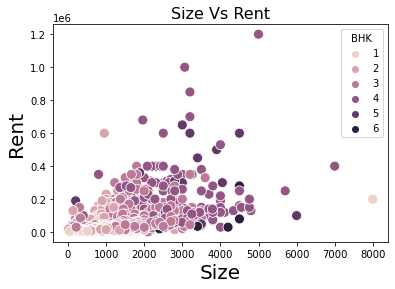

In [593]:
plt.title("Size Vs Rent",fontsize=16)
sns.scatterplot(data1["Size"],data1.Rent,hue=data1["BHK"],s=100)
plt.xlabel("Size",fontsize=20)
plt.ylabel("Rent",fontsize=20)
plt.show()

##### ALL Insights from bivariate and multivariate analysis:

#Rent of 5bhk houses are higher compared to other bhk types even 6,this may be because the 6bhk houses are in the outskirts of the city.  
#we can see higher the size of house higher the bhk,which clearly shows there is  correlation.  
#Unfurnished larger house rents are similar to furnished small house.  
#The floor number is has no bigger effect on rental price.  
#Of all the bhk types in each cities,mumbai is the costliest for all.  
#6bhk houses are not present in delhi,mumbai,banglore as per our dataset this shows biasness in sample collected.  
#Of all the cities,the rent of Carpet area houses are costlier compared to other area types.  
#The average price of the rent for family type is high compared to other.  
#Fully furnished house average price is high compared to unfurnished and semifurnished.  
#Rental houses contacted via agent has high avg rental price and shows broker are charging high commissions.  

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

In [594]:
data1.columns

Index(['Posted On', 'BHK', 'Rent', 'Size', 'Area Type', 'Area Locality',
       'City', 'Furnishing Status', 'Tenant Preferred', 'Bathroom',
       'Point of Contact', 'Floor Number', 'Total Floor'],
      dtype='object')

### DATA PREPROCESSING

In [595]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Posted On          4746 non-null   object 
 1   BHK                4746 non-null   int64  
 2   Rent               4746 non-null   float64
 3   Size               4746 non-null   int64  
 4   Area Type          4746 non-null   object 
 5   Area Locality      4746 non-null   object 
 6   City               4746 non-null   object 
 7   Furnishing Status  4746 non-null   object 
 8   Tenant Preferred   4746 non-null   object 
 9   Bathroom           4746 non-null   int64  
 10  Point of Contact   4746 non-null   object 
 11  Floor Number       4746 non-null   int64  
 12  Total Floor        4746 non-null   int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 482.1+ KB


#### 1. REMOVING DUPLICATES,IMPUTING MISSING VALUES,FIXING FORMATS,REMOVING OUTLIERS(Unless very sure,if not do it     once after checking the performance of thr model)  

In [596]:
# Note:

# Our dataset doesnot contain any missing entries,if found there should appropraitely dealt with the help of central tendencies(mean,median,mode)
# if the data is normally distributed(continuous numerical),empty cells can be filled by mean,if the data is skewed it can filled by median,if its categorical then by mode.
# if the target value is missing ,its appropriate to remove that record/row.
# if the number of missing values are higher in a series/column, its better to drop that column or fill it with conditional mean.
# outliers will be dealt later after seeing the performance of the model,since we are not sure about the outlier.

#### 2. ENCODING   

In [597]:
#Since we have most of the variables as categorical we will convert it into numerical through encoding techniques,so that the data can be read by linear model.

In [598]:
#COMPLEXITY OF HANDLING MORE CATEGORICAL VARIABLE IN LINEAR MODEL:

#Using One hot encoding and its draw backs:
#1.More number of features increases the complexity of the model and results in overfitting,which will increase the variance in validation data.
#2.computation is heavier
#3.This will produce multicollinearity between independent variables.(redundancy)


In [599]:
# convert column to date type 
data1['Posted On'] = pd.to_datetime(data1['Posted On'])

In [600]:
#split year month date from a column 
#data1['Posted_year'] = data1['Posted On'].dt.year 
#data1['Posted_month'] =data1['Posted On'].dt.month 
#data1['Posted_day'] = data1['Posted On'].dt.day 

In [601]:
#dropping column posted on since we have already splitted the column
data1.drop(["Posted On"],axis = 1,inplace= True)

In [602]:
#Dropping variable_ area locality which contains more than 2000 unique values
data1.drop(["Area Locality"],axis=1,inplace=True)

In [603]:
# We will label encode the variables which are ordinal- Furnishing status.
# We are not sure about the Area type, so better we will opt for one hot encoding.Later based on performance we will try it as label
# The rest of categories will be one hot encoded.

In [604]:
#storing a copy of cleaned data before encoding and cleaning to utilize for decision tree
data2 = data1 

In [605]:
#from sklearn.preprocessing import LabelEncoder

In [606]:
#creating label encoder object
#le = LabelEncoder()
#feeding variable into object for conversion
#data1["Furnishing Status"] = le.fit_transform(data1["Furnishing Status"])
#try label encoding in reverse

In [607]:
#create dummy variables-one hot encoding
data_final = pd.get_dummies(data1,columns=['Bathroom','BHK','Area Type','City','Tenant Preferred','Point of Contact','Furnishing Status'])

In [608]:
data_final

,Rent,Size,Floor Number,Total Floor,Bathroom_1,Bathroom_2,Bathroom_3,Bathroom_4,Bathroom_5,Bathroom_6,...,City_Mumbai,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Point of Contact_Contact Owner,Furnishing Status_Furnished,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished
0,10000.0,1100,0,2,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
1,20000.0,800,1,3,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,17000.0,1000,1,3,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
3,10000.0,800,1,2,1,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,7500.0,850,1,2,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,15000.0,1000,3,5,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4742,29000.0,2000,1,4,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4743,35000.0,1750,3,5,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
4744,45000.0,1500,23,34,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0


In [609]:
#Dropping dummies of reference level for all categorical variables and posted year which does not have relation with rent price
data_final.drop(["Bathroom_1","BHK_6","Area Type_Super Area","City_Bangalore","Tenant Preferred_Family","Point of Contact_Contact Owner","Furnishing Status_Furnished"],axis=1,inplace=True)

In [610]:
#Final data to normalize (rent and size)
data_final

,Rent,Size,Floor Number,Total Floor,Bathroom_2,Bathroom_3,Bathroom_4,Bathroom_5,Bathroom_6,Bathroom_7,...,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Tenant Preferred_Bachelors,Tenant Preferred_Bachelors/Family,Point of Contact_Contact Agent,Point of Contact_Contact Builder,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished
0,10000.0,1100,0,2,1,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
1,20000.0,800,1,3,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,17000.0,1000,1,3,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,10000.0,800,1,2,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
4,7500.0,850,1,2,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,15000.0,1000,3,5,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4742,29000.0,2000,1,4,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4743,35000.0,1750,3,5,0,1,0,0,0,0,...,0,1,0,0,0,1,1,0,1,0
4744,45000.0,1500,23,34,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0


#### 3.NORMALIZATION

In [611]:
#Lets do normalization to scale down the values to same level for fair comparison
#Since we are not sure about the distribution lets perform normalization

In [612]:
from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler

In [613]:
#create object
#scaler = StandardScaler() 
#fit model to object with data and transform
scaler = MinMaxScaler()
stdz = scaler.fit_transform(data_final[["Rent","Size"]])
standard_col = pd.DataFrame(stdz,columns=["s_Rent","s_Size"])

In [614]:
standard_col.isnull().sum()

s_Rent    0
s_Size    0
dtype: int64

In [615]:
data_final.drop(["Rent","Size"],axis=1,inplace=True)

In [616]:
model_data = pd.concat([data_final,standard_col],axis=1)
model_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Floor Number                       4746 non-null   int64  
 1   Total Floor                        4746 non-null   int64  
 2   Bathroom_2                         4746 non-null   uint8  
 3   Bathroom_3                         4746 non-null   uint8  
 4   Bathroom_4                         4746 non-null   uint8  
 5   Bathroom_5                         4746 non-null   uint8  
 6   Bathroom_6                         4746 non-null   uint8  
 7   Bathroom_7                         4746 non-null   uint8  
 8   Bathroom_10                        4746 non-null   uint8  
 9   BHK_1                              4746 non-null   uint8  
 10  BHK_2                              4746 non-null   uint8  
 11  BHK_3                              4746 non-null   uint8

In [617]:
#Since VIF of BHK is Higher to 17 we will drop it and rerun the model again
model_data.drop(["BHK_1","BHK_2","BHK_3","BHK_4","BHK_5",],axis=1,inplace=True)

###  BUILDING MODEL

### Splitting data into Train ,Validation and Test

In [618]:
#Separting Dependent(y) and Independent variables(X)
X = model_data.drop(["s_Rent"],axis=1)
y = model_data.s_Rent

In [619]:
X.columns

Index(['Floor Number', 'Total Floor', 'Bathroom_2', 'Bathroom_3', 'Bathroom_4',
       'Bathroom_5', 'Bathroom_6', 'Bathroom_7', 'Bathroom_10',
       'Area Type_Built Area', 'Area Type_Carpet Area', 'City_Chennai',
       'City_Delhi', 'City_Hyderabad', 'City_Kolkata', 'City_Mumbai',
       'Tenant Preferred_Bachelors', 'Tenant Preferred_Bachelors/Family',
       'Point of Contact_Contact Agent', 'Point of Contact_Contact Builder',
       'Furnishing Status_Semi-Furnished', 'Furnishing Status_Unfurnished',
       's_Size'],
      dtype='object')

In [620]:
#importing library to split data and use linear regression model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [621]:
#Based on the size of the dataset we roughly decide the split ratio which is not subjective,lets make a 70:30 split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state =42)

In [622]:
#From the train data now we can split the validation data which can be used to validate the trained model over this data.
#The test data kept under complete darkness for final testing of the model.
#here we are again making 70:30 split,which is 30% of 70% which is 0.43
X_train,X_valid,y_train,y_valid = train_test_split(X_train,y_train,test_size=0.43,random_state=42) 

In [623]:
#Fitting the linear model to the train dataset for the model to get trained
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [624]:
#Point of intercept of the regression line over yaxis
reg.intercept_

-0.01186659187698921

In [625]:
#there are the regressors of each predictor variable  which determines the prediction
reg.coef_

array([ 2.14660774e-04,  3.04154355e-04, -2.23526007e-03,  4.87367796e-03,
        7.97763168e-02,  1.47481585e-01,  7.74302962e-02, -2.24846070e-02,
        3.46944695e-18,  9.72115001e-04,  1.10339883e-03, -2.60573903e-04,
        6.53363474e-03, -6.82545620e-03,  1.07905659e-03,  3.81749471e-02,
        3.92629477e-03,  7.46478110e-03,  5.51447344e-03,  3.12250226e-17,
       -7.54290478e-03, -7.89196436e-03,  1.95275149e-01])

In [626]:
#Rsquare value gives the fitness of the model with data(proportion of explained error over total error in prediction)
reg.score(X_train,y_train)

0.6262168245605393

In [627]:
#Overall Normalizing and Numerical variable normalizing doesnot improve R2

In [628]:
#OLS Model_ helps to choose the unknown parameters of the linear regression model based on the principle of least squares
X_ = pd.DataFrame(X_train)
Y_ = pd.Series(y_train)
X_ = sm.add_constant(X_)
lm =sm.OLS(Y_,X_).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 s_Rent   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     149.3
Date:                Tue, 08 Nov 2022   Prob (F-statistic):               0.00
Time:                        22:36:04   Log-Likelihood:                 3819.7
No. Observations:                1893   AIC:                            -7595.
Df Residuals:                    1871   BIC:                            -7473.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -0.0119      0.004     -2.857      0.004      -0.020      -0.004
Floor Number                          0.0002      0.000      0.763      0.446      -0.000       0.001
Total Floor                           0.0003      0.000      1.607      0.108   -6.72e-05       0.001
Bathroom_2                           -0.0022      0.002     -1.152      0.250      -0.006       0.002
Bathroom_3                            0.0049      0.003      1.524      0.128      -0.001       0.011
Bathroom_4                            0.0798      0.006     13.388      0.000       0.068       0.091
Bathroom_5                            0.1475      0.008     17.761      0.000       0.131       0.164
Bathroom_6                            0.0774      0.020      3.874      0.000       0.038       0.117
Bathroom_7                           -0.0225      0.024     -0.955      0.339      -0.069       0.024
Bathroom_10                       -1.019e-16   3.39e-17     -3.003      0.003   -1.69e-16   -3.54e-17
Area Type_Built Area                  0.0010      0.023      0.042      0.966      -0.044       0.046
Area Type_Carpet Area                 0.0011      0.002      0.575      0.566      -0.003       0.005
City_Chennai                         -0.0003      0.002     -0.105      0.916      -0.005       0.005
City_Delhi                            0.0065      0.003      2.290      0.022       0.001       0.012
City_Hyderabad                       -0.0068      0.003     -2.713      0.007      -0.012      -0.002
City_Kolkata                          0.0011      0.003      0.370      0.711      -0.005       0.007
City_Mumbai                           0.0382      0.003     12.461      0.000       0.032       0.044
Tenant Preferred_Bachelors            0.0039      0.003      1.276      0.202      -0.002       0.010
Tenant Preferred_Bachelors/Family     0.0075      0.003      2.813      0.005       0.002       0.013
Point of Contact_Contact Agent        0.0055      0.002      2.387      0.017       0.001       0.010
Point of Contact_Contact Builder  -1.235e-18   1.91e-18     -0.646      0.519   -4.98e-18    2.52e-18
Furnishing Status_Semi-Furnished     -0.0075      0.002     -3.233      0.001      -0.012      -0.003
Furnishing Status_Unfurnished        -0.0079      0.002     -3.268      0.001      -0.013      -0.003
s_Size                                0.1953      0.016     12.191      0.000       0.164       0.227
==============================================================================
Omnibus:                     2625.257   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1297438.964
Skew:                           7.548   Prob(JB):                         0.00
Kurtosis:    

In [629]:
#Prediction made by the model(lets use validation data)

In [630]:
reg_pred = reg.predict(X_valid)
reg_pred

array([ 0.01994676,  0.00331555, -0.00459788, ...,  0.01583403,
        0.0033904 ,  0.03534828])

#### Evaluating the model

In [631]:
#Accuracy in prediction(on validation data)

In [632]:
#MAE (mean absolute error)
np.mean(np.abs(y_valid-reg_pred))

0.01533003414694898

In [ ]:
#Check for homoscedacity

In [638]:
residuals =(y_valid-reg_pred)

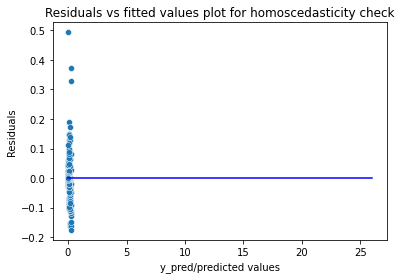

In [640]:
p = sns.scatterplot(reg_pred,residuals)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')
#plt.ylim(-10,10)
#plt.xlim(0,26)
p = sns.lineplot([0,26],[0,0],color='blue')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check')

In [633]:
#MSE
np.mean((y_valid -reg_pred)**2)

0.001056902416508334

In [634]:
#RMSE
np.sqrt(np.mean((y_valid-reg_pred)**2))

0.03251003562760789

In [635]:
#MAPE
np.mean(np.abs(y_valid-reg_pred)/y_valid)*100

inf

## VIF

In [636]:
#importing stats library for identifying mutiple correlation between independent variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [637]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                          for i in range(len(X_train.columns))]
  
print(vif_data)

                              feature       VIF
0                        Floor Number  6.242092
1                         Total Floor  8.377702
2                          Bathroom_2  3.296105
3                          Bathroom_3  2.694400
4                          Bathroom_4  1.836070
5                          Bathroom_5  1.755806
6                          Bathroom_6  1.130715
7                          Bathroom_7  1.056520
8                         Bathroom_10       NaN
9                Area Type_Built Area  1.005326
10              Area Type_Carpet Area  3.100926
11                       City_Chennai  1.928042
12                         City_Delhi  1.639968
13                     City_Hyderabad  1.988792
14                       City_Kolkata  1.602545
15                        City_Mumbai  3.134352
16         Tenant Preferred_Bachelors  2.330477
17  Tenant Preferred_Bachelors/Family  5.382225
18     Point of Contact_Contact Agent  3.035563
19   Point of Contact_Contact Builder   

In [547]:
#VIF indicates how strong the correlation exists between one independent variable and the others.
#As per industrial stands Vif > 5 is considered as a significant mullticollinearity which is to be addressed.

In [ ]:
#Recommendations to improve the model accuracy

#Try taking log transformation of numerical variables
#Try adding newer higher polynomial variables
#check for outliers

+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

### DECISION TREE

In [656]:
from sklearn.tree import DecisionTreeRegressor

In [691]:
data_dt = data2.copy()
le = LabelEncoder()
#feeding variable into object for conversion
data_dt["Furnishing Status"] = le.fit_transform(data_dt["Furnishing Status"])
data_dt["Area Type"] = le.fit_transform(data_dt["Area Type"])
data_dt["City"] = le.fit_transform(data_dt["City"])
data_dt["Tenant Preferred"] = le.fit_transform(data_dt["Tenant Preferred"])
data_dt["Point of Contact"] = le.fit_transform(data_dt["Point of Contact"])

In [695]:
data_dt.drop(["Size"],axis=1,inplace=True)

In [696]:
#Separting Dependent(y) and Independent variables(X) without any data
X = data_dt.drop(["Rent"],axis=1)
y = data_dt.Rent

In [697]:
reg_tree = DecisionTreeRegressor(max_depth=3)#in the terminal node there should be atleast 5 values
reg_tree.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [698]:
list(X)

['BHK',
 'Area Type',
 'City',
 'Furnishing Status',
 'Tenant Preferred',
 'Bathroom',
 'Point of Contact',
 'Floor Number',
 'Total Floor']

In [1]:
from sklearn import tree
fig,axes = plt.subplots(figsize=(3,3),dpi=30)
tree.plot_tree(reg_tree)#,feature_names =['BHK','Area Type','City','Furnishing Status','Tenant Preferred','Bathroom','Point of Contact','Floor Number','Total Floor'],filled = False)
plt.show()

NameError: name 'plt' is not defined

In [672]:
y_pred = reg_tree.predict(X_valid)
y_pred

array([0.01055434, 0.01055434, 0.01055434, ..., 0.02931197, 0.01055434,
       0.02931197])

In [673]:
#Hyperparameter tuning-choosing best depth
depth = np.arange(1,20)
mae = []

for k in depth:
    reg_tree = DecisionTreeRegressor(max_depth=k,min_samples_leaf=5)
    reg_tree.fit(X_train,y_train)
    y_pred = reg_tree.predict(X_valid)
    mae.append(np.mean(np.abs(y_valid-y_pred)))

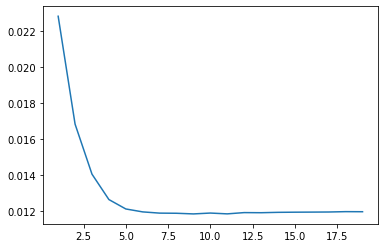

In [674]:
#we can see the error is reducing for each depth of decision tree model
#we choose the one with the least
plt.plot(depth,np.array(mae))
plt.show()

In [675]:
#fit a DT model of depth 5 on the training data and test its performance on the test data by calculating the MAE
reg_tree = DecisionTreeRegressor(max_depth=5,min_samples_leaf=5)
reg_tree.fit(X_train,y_train)
y_pred = reg_tree.predict(X_test)
np.mean(np.abs(y_test-y_pred))

0.01115116150105128

In [676]:
#fit a DT model of depth 6 on the training data and test its performance on the test data by calculating the MAE
reg_tree = DecisionTreeRegressor(max_depth=6,min_samples_leaf=5)
reg_tree.fit(X_train,y_train)
y_pred = reg_tree.predict(X_test)
np.mean(np.abs(y_test-y_pred))

0.010499561327567688

In [677]:
#Evaluating the model

In [678]:
#MAE
np.mean(np.abs(y_valid-y_pred))

ValueError: operands could not be broadcast together with shapes (1429,) (1424,) 

In [679]:
#MSE
np.mean((y_valid -y_pred)**2)

ValueError: operands could not be broadcast together with shapes (1429,) (1424,) 

In [ ]:
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

### 3.KNN MODEL

In [712]:
from sklearn.neighbors import KNeighborsClassifier

In [718]:
  
# Create feature and target arrays
X = model_data.drop(["s_Rent"],axis=1)
y = model_data.s_Rent
  
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
  
#metric = minkowski is the generalised form to calculate distance in which p=2 represents Eucliden distance
classifier1= KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2 ) 
#fitting model to data
classifier1.fit(X_train, y_train) 

#framing fixed input in dataframe to predict MPG
fixed_input = pd.concat(X_test,y_test)

#predicting y for the fixed inputs
y_pred= classifier1.predict(fixed_input)  
k2_pred.append(y_pred)

TypeError: cannot convert the series to <class 'int'>

--------------------------------------------------------------------------------------------------------------------------------